In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
import scipy 

%matplotlib inline

## 1 Lectura de datos

In [2]:
datos_junaeb = pd.read_csv('../datos tarea 1/junaeb.csv')
datos_junaeb.dropna(inplace=True)

In [3]:
datos_junaeb.reset_index(drop=True, inplace=True)
datos_junaeb

,vive_padre,vive_madre,n_personas,n_habitaciones,cercania_juegos,cercania_servicios,edad_primer_parto,area,educm,educp
0,0,1,3.0,4.0,1.0,1.0,25.0,1,0,0
1,0,1,5.0,3.0,1.0,1.0,23.0,1,13,13
2,1,1,5.0,3.0,1.0,1.0,19.0,1,12,17
3,1,1,4.0,2.0,1.0,1.0,27.0,1,6,13
4,1,1,5.0,3.0,2.0,1.0,20.0,1,13,16
...,...,...,...,...,...,...,...,...,...,...
6374,1,1,4.0,2.0,1.0,1.0,24.0,1,15,13
6375,1,1,4.0,2.0,1.0,1.0,22.0,1,15,15
6376,0,1,3.0,2.0,1.0,1.0,40.0,1,15,0
6377,1,1,4.0,2.0,1.0,1.0,29.0,1,13,13


## 2 Limpieza de datos
Verificamos si existen outliers en cada variable que esté restringida a ciertos valores determinados

1.0    5503
2.0     834
4.0      42
Name: cercania_servicios, dtype: int64

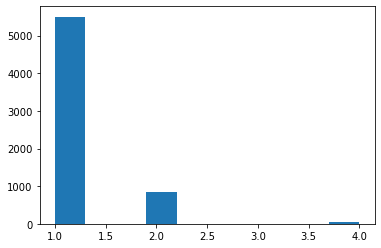

In [4]:
plt.hist(datos_junaeb['cercania_servicios'])
datos_junaeb.cercania_servicios.value_counts()

1.0    5184
2.0    1154
4.0      41
Name: cercania_juegos, dtype: int64

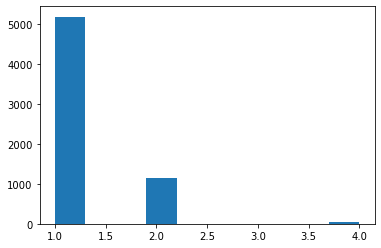

In [5]:
plt.hist(datos_junaeb['cercania_juegos'])
datos_junaeb.cercania_juegos.value_counts()

1    4373
0    2006
Name: vive_padre, dtype: int64

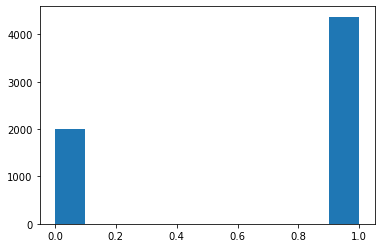

In [6]:
plt.hist(datos_junaeb['vive_padre'])
datos_junaeb.vive_padre.value_counts()

1    6208
0     166
2       5
Name: vive_madre, dtype: int64

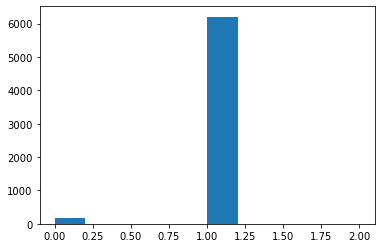

In [7]:
plt.hist(datos_junaeb['vive_madre'])
datos_junaeb.vive_madre.value_counts()

En este ultimo histograma, nos damos cuenta que existen valores fuera de rango(vive_madre=2) para la variable vive_madre, ya que solo puede tomar valores 0 o 1 y se procede a eliminar dichos datos erroneos

1    6208
0     166
Name: vive_madre, dtype: int64

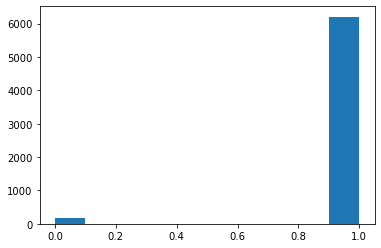

In [8]:
#Eliminar datos fuera de rango para la variable vive_madre

datos_junaeb.drop(datos_junaeb[datos_junaeb['vive_madre']==2].index,inplace =True)

plt.hist(datos_junaeb['vive_madre'])
datos_junaeb.vive_madre.value_counts()

In [9]:
datos_junaeb

,vive_padre,vive_madre,n_personas,n_habitaciones,cercania_juegos,cercania_servicios,edad_primer_parto,area,educm,educp
0,0,1,3.0,4.0,1.0,1.0,25.0,1,0,0
1,0,1,5.0,3.0,1.0,1.0,23.0,1,13,13
2,1,1,5.0,3.0,1.0,1.0,19.0,1,12,17
3,1,1,4.0,2.0,1.0,1.0,27.0,1,6,13
4,1,1,5.0,3.0,2.0,1.0,20.0,1,13,16
...,...,...,...,...,...,...,...,...,...,...
6374,1,1,4.0,2.0,1.0,1.0,24.0,1,15,13
6375,1,1,4.0,2.0,1.0,1.0,22.0,1,15,15
6376,0,1,3.0,2.0,1.0,1.0,40.0,1,15,0
6377,1,1,4.0,2.0,1.0,1.0,29.0,1,13,13


## OLS
La variable dependiente en estudio es vive_padre y todas las demas son las posibles variables explicativas sobre que el padre se encuentre o no viviendo en el hogar

In [10]:
y=datos_junaeb['vive_padre']
X=datos_junaeb[['vive_madre','n_personas','n_habitaciones','cercania_juegos','cercania_servicios','edad_primer_parto','area','educm','educp']]

X=sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             vive_padre   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     143.3
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          2.85e-247
Time:                        12:10:43   Log-Likelihood:                -3567.3
No. Observations:                6374   AIC:                             7155.
Df Residuals:                    6364   BIC:                             7222.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1166      0

Para realizar las pruebas de hipotesis de significancia individual utilizamos el valor p, puesto que el tamaño de la muestra no afecta a los resultados. La tabla de resultados nos muestra que existen 2 de 9 variables no significativas, las cuales corresponden a cercania de juegos y cercania de servicios, el resto de las variables son significativas en su mayoria con 99% de confianza.

En cuanto a la interpretación de las varaibles explicativas, se tiene que por ejemplo la probabilidad de que el padre viva en el hogar aumenta en un 3,34% cuando aumenta en una unidad el año educacional del padre. Lo mismo pasa con la variable vive_madre, donde podemos notar que la probabilidad de que el padre en el hogar aumenta en 12.14% cuando la madre vive en el hogar.

In [11]:
## 3. Probit

model = sm.Probit(y, X)
probit_model = model.fit()
print(probit_model.summary())

mfx = probit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.538584
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:             vive_padre   No. Observations:                 6374
Model:                         Probit   Df Residuals:                     6364
Method:                           MLE   Df Model:                            9
Date:                Thu, 15 Sep 2022   Pseudo R-squ.:                  0.1353
Time:                        12:10:43   Log-Likelihood:                -3432.9
converged:                       True   LL-Null:                       -3969.9
Covariance Type:            nonrobust   LLR p-value:                2.017e-225
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2186      0.174     -6.999      0.000      -1.560      -0.877
vive_

Al igual que en el caso de OLS, utilizamos el valor p como prueba de hipotesis de significacncia individual, ya que se el tamaño de la muestra no afecta en los resultados. Los resultados muestran que existen 2 de 9 variables no significativas, las cuales corresponden a cercania de juegos y cercania de servicio, las demás variables son significativas con un 99% de confianza. En esta oación la estimacion de los betas no representan cambio marginal, dada la forma no lineal. 
Es por esto que estudiamos los efctos marginales (dy/dx) donde existirán distintas interpretaciones dependiendo de si la variable es discreta o continua. En el caso de las variables continuas por ejemplo: para la variable educm, a medida que aumenta en una unidad los años de escolaridad de la madre, la probabilidad de que el padre viva en la casa disminuye en un 1,57%. Para la variables discreta; se tiene que para el area, si el lugar se encuentra en un sector urbano, disminuye en un 7,32% la probabilidad de que el padre viva en la casa.


In [12]:
# 4. Logit

model = sm.Logit(y, X)
logit_model = model.fit()
print(logit_model.summary())

mfx = logit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.535948
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             vive_padre   No. Observations:                 6374
Model:                          Logit   Df Residuals:                     6364
Method:                           MLE   Df Model:                            9
Date:                Thu, 15 Sep 2022   Pseudo R-squ.:                  0.1395
Time:                        12:10:43   Log-Likelihood:                -3416.1
converged:                       True   LL-Null:                       -3969.9
Covariance Type:            nonrobust   LLR p-value:                1.133e-232
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1427      0.298     -7.186      0.000      -2.727      -1.558
vive_

En el caso del Logit, podemos notar que; las variables que son significativas siguen siendo las mismas en comparación al modelo Probit. Esto se debe a que los efectos marginales entre ambos métodos son practicamente los mismos y solo difieren en la distribución del error que asume cadad uno.
La interpretación de los efectos marginales es identica a la realizada anteriormente para el modelo Probit.


## Comentar resultados 

Tal como pudimos observar en cada uno de los modelos, las varibables significativas no cambiaron entre estos, sin embargo pudimos notar que el valor predicho de la variable dependiente en el modelo OLS se encuentra fuera del rango de valores especificados para esta variable, es por ello que se utlilizan los modelos Logit y Probit para las variables dependiente limitadas (dummy) dada la no linealidad del modelo.


## Poisson

0    3.0
1    5.0
2    5.0
3    4.0
4    5.0
Name: n_personas, dtype: float64

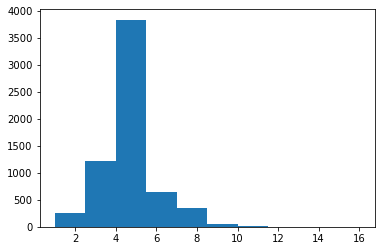

In [13]:
subset=datos_junaeb.loc[datos_junaeb['n_personas']<17]
y=subset['n_personas']
X=subset[['vive_padre','vive_madre','n_habitaciones','cercania_juegos','cercania_servicios','edad_primer_parto','area','educm','educp']]
plt.hist(subset.n_personas)
subset.n_personas.head()

A simple vista en este grafico podemos notar que no existirá sobredispersión, dado que la mayor concentracion de los datos no se encuentran tan alejados de la media

In [14]:
poisson=sm.GLM(y,X,family=sm.families.Poisson()).fit()
print(poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             n_personas   No. Observations:                 6374
Model:                            GLM   Df Residuals:                     6365
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11720.
Date:                Thu, 15 Sep 2022   Deviance:                       2312.2
Time:                        12:10:44   Pearson chi2:                 2.55e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
vive_padre             0.1168      0

In [15]:
print("fitted lambda")
print(poisson.mu)

fitted lambda
[4.65988871 4.20261155 4.79037311 ... 3.38602891 3.96899529 4.14113266]


### Interpretación de coeficientes Poisson
Dado la naturaleza logaritmica de la funcion de distribucion Poisson, podemos notar que la interpretacion de los coeficientes beta que entrega el modelo será del estilo Log-Nivel. Por ejemplo, si interpretamos el efecto de la variable n_habitaciones sobre n_personas, podemos decir que esta variable aumentará en un 15,2% cuando aumente en una unidad la variable n_habitaciones, es decir, cuando aumente en una la cantidad de habitaciones en el hogar. Es logico pensar esto ya que, si una casa tiene mas habitaciones, eventualmente podrian vivir más personas en ella.

A diferencia de la interpretacion para la variable discreta anterior, para interpretar las variables dummy cambia un poco. Si analizamos la variable vive_madre podemos ver que, la cantidad de personas que viven en la casa aumenta en un 68,4% cuando la madre efectivamente vive en el hogar. En cambio, al analizar la variable vive_padre notamos que la cantidad de personas que viven en la casa aumenta en un 11,68% cuando el padre vive en el hogar. Esto tiene lógica ya por lo general se da que los hijos pequeños dependen mucho de la madre, por lo que no es errado el pensamiento que si la madre efectivamente vive en la casa, es probable que vivan mas personas en ella, a diferencia de lo que ocurre con el padre.

### Test de sobredispersion y posible valor alpha

In [16]:
ov = (2.55*10**3)/6365
print(ov)

0.40062843676355064


Al realizar el test de sobredispersión, notamos que el cuociente del Pearson chi-cuadrado y Df Residuals nos da como resultado 0.4, el cual es un valor menor a 1, lo que nos indica que no existe sobredispersión. Por este motivo, no seria necesario realizar la aproximacion mediante la distribucion binomial negativa, pues esta se utiliza para relajar la distribucion de Poisson(cuando existe sobredispersión)

In [17]:
aux=((y-poisson.mu)**2-poisson.mu)/poisson.mu
auxr=sm.OLS(aux,poisson.mu).fit()
print(auxr.params)

x1   -0.110029
dtype: float64


Al calcular el valor alpha óptimo de la distribución binomial negativa mediante la regresión lineal que utiliza como único regresor la variable aux=[(𝑦−𝜆)2−𝜆]/𝜆[(y−λ)2−λ]/λ , nos entrega un valor de -0,11, el cual al momento de utilizarlo en la construcción del modelo binomial negativo nos despliega un error, puesto que alpha tiene que ser mayor a cero (dada la naturaleza de los logaritmos) es por esta razón que se decidió no utilizar la distribucion binomial negativa en este caso.

## Conclusiones finales.
Dado que la distribucion binomial negativa no se realizó, no fue posible contrastar la informacion entregada por ese modelo versus la de Poisson, pero a grandes rasgos podemos decir que, para este caso particular, el mejor modelo estimado fue el de Poisson dado que al no existir sobredispersión, el modelo no tiene ningun problema en cuanto a su funcionamiento.
Cabe mencionar que la distribucion binomial negativa es un tipo de distribucion que se utiliza para la relajacion de la distribución Poisson, la cual en este caso no fue necesaria.